In [ ]:
import pandas as pd
import numpy as np
import os
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Задание 1

In [2]:
# Загрузим данные по именам детей
PATH_TO_DATA = 'input/babynames/'
babynames = pd.DataFrame()
for filename in os.listdir(PATH_TO_DATA):
    if not str(filename).endswith('.txt'):
        continue
    df_ = pd.read_csv(PATH_TO_DATA + filename, names = ['name', 'sex', 'count'], header = None)
    df_['year'] = int(str(filename)[3:7])
    babynames = pd.concat([babynames,df_])
babynames.head()

,name,sex,count,year
0,Emily,F,25949,2000
1,Hannah,F,23066,2000
2,Madison,F,19965,2000
3,Ashley,F,17991,2000
4,Sarah,F,17677,2000


###### Сгруппируйте данные по полу и году и визуализируйте общую динамику рождаемости обоих полов

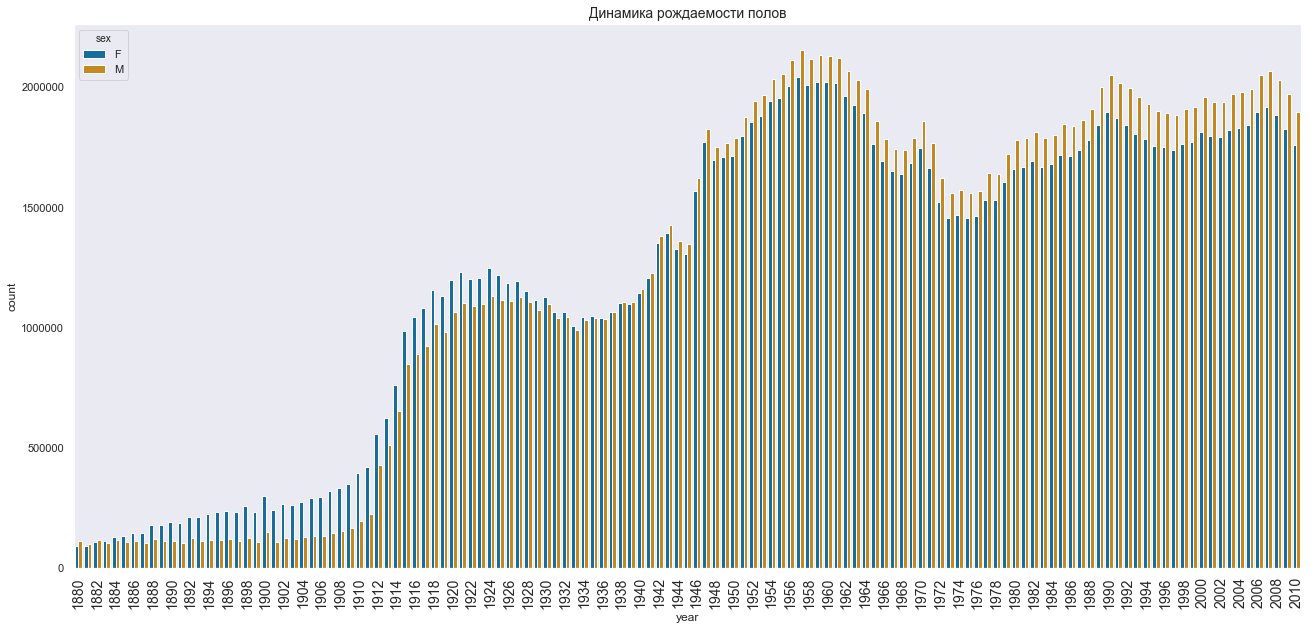

In [31]:
m1 = babynames.groupby(['year', 'sex']).agg({'count':'sum'}).reset_index()
fig, ax = plt.subplots(figsize = (22,10))
g = sns.barplot(x="year", y="count", hue="sex", data=m1);
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%2==1:
        xticks[i].set_visible(False)
g.set_xticklabels(g.get_xticklabels(), rotation=90, fontsize=14);
#sns.set_context('poster')  #Everything is larger
g.set_title('Динамика рождаемости полов', fontsize = 14);

###### Найдите самые популярные имена за всю историю

In [4]:
m2 = babynames.groupby(['name', 'sex']).agg({'count':'sum'}).reset_index().sort_values('count', ascending = False)
m2.head(n = 15)

,name,sex,count
38999,James,M,5049727
43381,John,M,5040319
75712,Robert,M,4767995
63724,Michael,M,4243903
61634,Mary,F,4103935
94462,William,M,3986586
21566,David,M,3525961
75237,Richard,M,2542735
44139,Joseph,M,2519280
16001,Charles,M,2335387


Одни из самых популярных <b>мужских имен</b>: James, John, Robert <br>
Одни из самых популярных <b>женских имен</b>: Mary, Patricia, Elizabeth 

###### Разбейте весь временной промежуток в данных на 10 частей и для каждой найдите самое популярное имя каждого пола. Для каждого найденного именивизуализируйте его динамику за все время

In [5]:
m3 = babynames.sort_values('year').copy()
m3.head()

,name,sex,count,year
1779,Curt,M,6,1880
1317,Hans,M,21,1880
1316,Elliott,M,21,1880
1315,Aubrey,M,21,1880
1314,Abram,M,21,1880


In [6]:
# Выделим bins 
bins = [ arr[0] for arr in np.array_split(m3.year.unique(), 10)]
bins.append(m3.year.max())
m3['bin'] = pd.cut(m3['year'], bins, include_lowest = True, 
                   labels = ['1880-1894', '1894-1907', '1907-1920', 
                             '1920-1933', '1933-1946', '1946-1959',
                             '1959-1972', '1972-1985', '1985-1998',
                             '1998-2010'
                            ])
m3.head()

,name,sex,count,year,bin
1779,Curt,M,6,1880,1880-1894
1317,Hans,M,21,1880,1880-1894
1316,Elliott,M,21,1880,1880-1894
1315,Aubrey,M,21,1880,1880-1894
1314,Abram,M,21,1880,1880-1894


In [7]:
# Найдем самые популярные имена в каждом бине для каждого пола
m4 = m3.sort_values(['bin', 'sex','count'], ascending = False).\
               drop_duplicates(['bin','sex'], keep = 'first')
m4

,name,sex,count,year,bin
16935,Jacob,M,35335,1999,1998-2010
0,Emily,F,26534,1999,1998-2010
14534,Michael,M,65384,1989,1985-1998
0,Jessica,F,55983,1987,1985-1998
12178,Michael,M,68713,1981,1972-1985
0,Jennifer,F,63098,1974,1972-1985
7522,Michael,M,86898,1961,1959-1972
0,Jennifer,F,63603,1972,1959-1972
6103,James,M,94601,1947,1946-1959
0,Linda,F,99651,1947,1946-1959


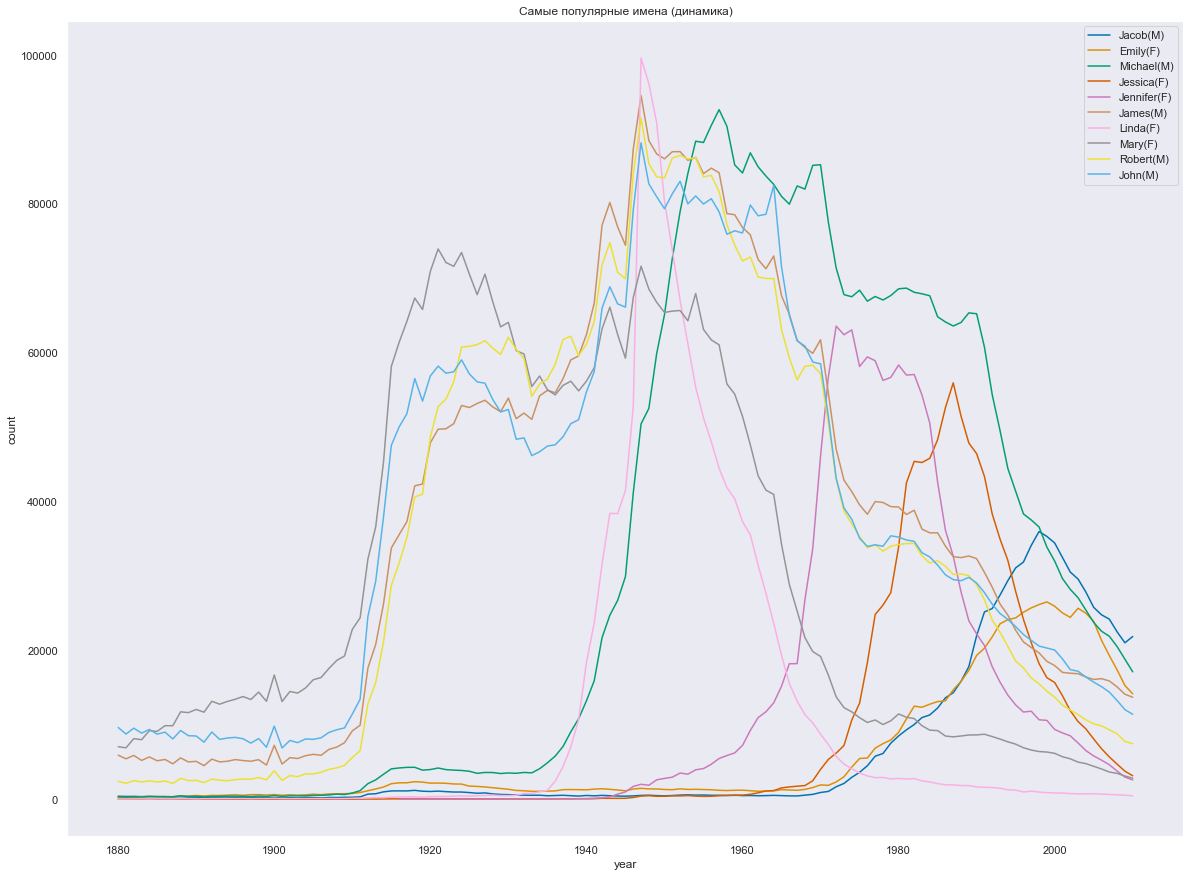

In [46]:
#Графики. Динамика за все время

plt.figure(figsize = (20,15))
for name, sex in m4[['name','sex']].drop_duplicates().values:
    df_ = babynames.loc[ (babynames['name'] == name) & (babynames['sex'] == sex)].sort_values('year').copy()
    #plt.figure()
    plt.plot(df_['year'], df_['count'], label = name + '(' + sex + ')')

#plt.title(str(name) + '(' + str(sex) + ')')
plt.xlabel('year');
plt.ylabel('count');
plt.legend();
plt.title('Самые популярные имена (динамика)');

**Для каждого года рассчитайте сколько имен покрывают 50% людей, визуализируйте (мы увидим разнообразие имен за каждый год)**

In [9]:
q = babynames.copy()
# количество имен в каждом году
q1 = q.groupby(['name', 'year'])['count'].sum().reset_index().rename(columns = {'count':'count_within_year'})

# общее количество человек в году
q2 = q.groupby(['year'])['count'].sum().reset_index().rename(columns = {'count':'count_all_year'})

In [10]:
# Посчитаем доли
q3 = pd.merge(q1, q2, on = 'year')
q3['share'] = q3['count_within_year']/q3['count_all_year']
q3 = q3.sort_values(['year', 'share'], ascending = False)
q3['cum_share'] = q3.groupby('year')['share'].cumsum()
q3.head()

,name,year,count_within_year,count_all_year,share,cum_share
76559,Isabella,2010,22761,3657392,0.006223,0.006223
76940,Jacob,2010,21902,3657392,0.005988,0.012212
91797,Sophia,2010,20503,3657392,0.005606,0.017818
78222,Jayden,2010,18475,3657392,0.005051,0.022869
74381,Ethan,2010,17885,3657392,0.004890,0.027759


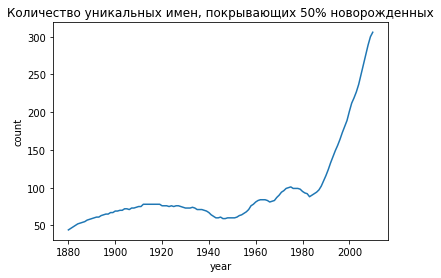

In [11]:
# только имена которые в сумме дают 50%
q4 = q3.loc[(q3['cum_share'] <= 0.5)]
q4 = q4.groupby('year')['name'].count().reset_index()

# Нарисуем график
plt.figure()
plt.plot(q4['year'], q4['name'])
plt.title('Количество уникальных имен, покрывающих 50% новорожденных')
plt.xlabel('year')
plt.ylabel('count')
plt.show()

**Выберите 4 года из всего промежутка и отобразите для каждого года распределение по первой букве в имени, по последней букве в имени**

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


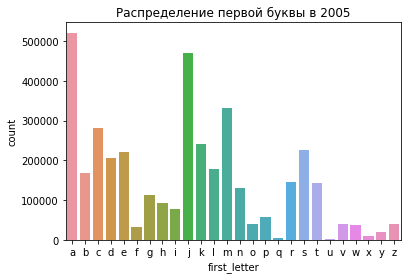

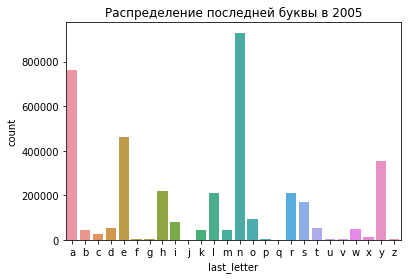

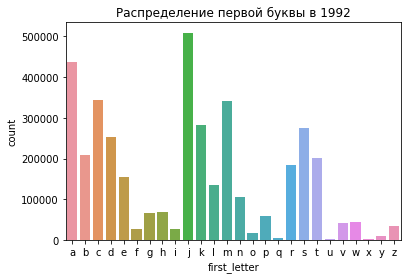

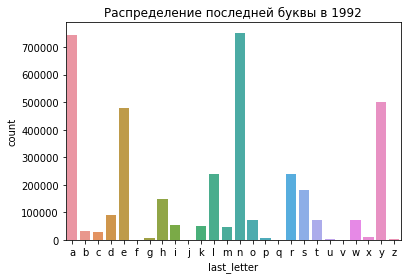

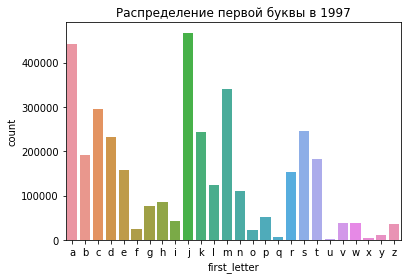

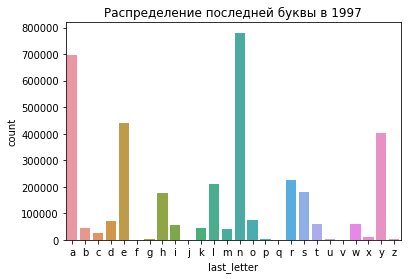

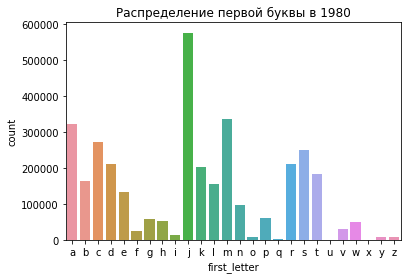

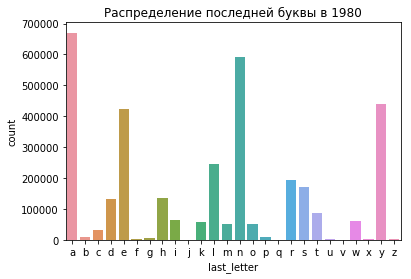

In [12]:
SELECTED_YEARS = [1980, 1992, 1997, 2005]
b = babynames.loc[babynames['year'].isin(SELECTED_YEARS)]
b['first_letter'] = b['name'].apply(lambda x: x.lower()[:1])
b['last_letter'] = b['name'].apply(lambda x: x.lower()[-1])

for year in b['year'].unique():
    b_first = b.loc[b['year'] == year].groupby(['year', 'first_letter'])['count'].sum().reset_index()
    b_last =  b.loc[b['year'] == year].groupby(['year', 'last_letter'])['count'].sum().reset_index()
    plt.figure()
    sns.barplot(x="first_letter", y="count", data=b_first)
    plt.title('Распределение первой буквы в ' + str(year) )
    plt.figure()
    sns.barplot(x="last_letter", y="count", data=b_last)
    plt.title('Распределение последней буквы в ' + str(year) )


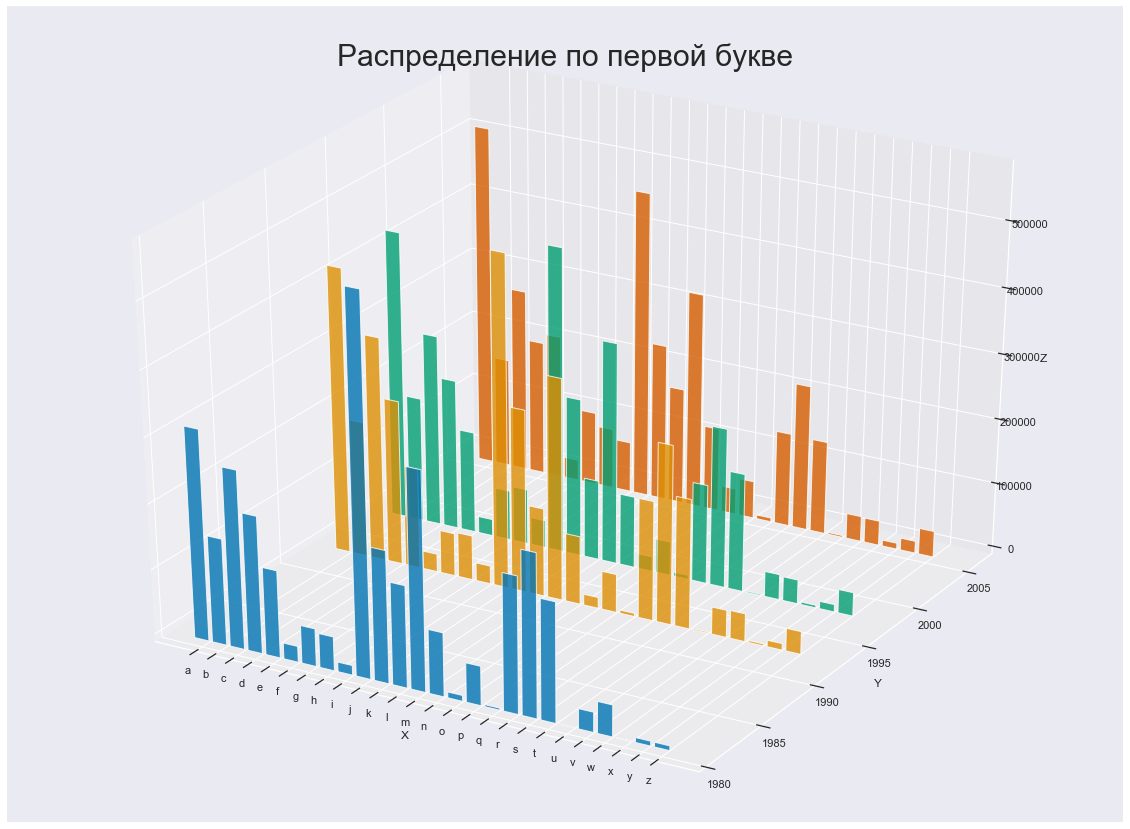

In [111]:
#3D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import string

fig = plt.figure(figsize = (20,15))
ax = fig.add_subplot(111, projection='3d')
b_first = b.groupby(['year', 'first_letter'])['count'].sum().reset_index()
for year in b_first['year'].unique():
    df_ = b_first.loc[b_first['year'] == year]
    ax.bar(df_['first_letter'], df_['count'], year, zdir = 'y',   alpha = 0.8)
plt.ylim((1980,2007))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Распределение по первой букве', fontsize = 30)

plt.show()

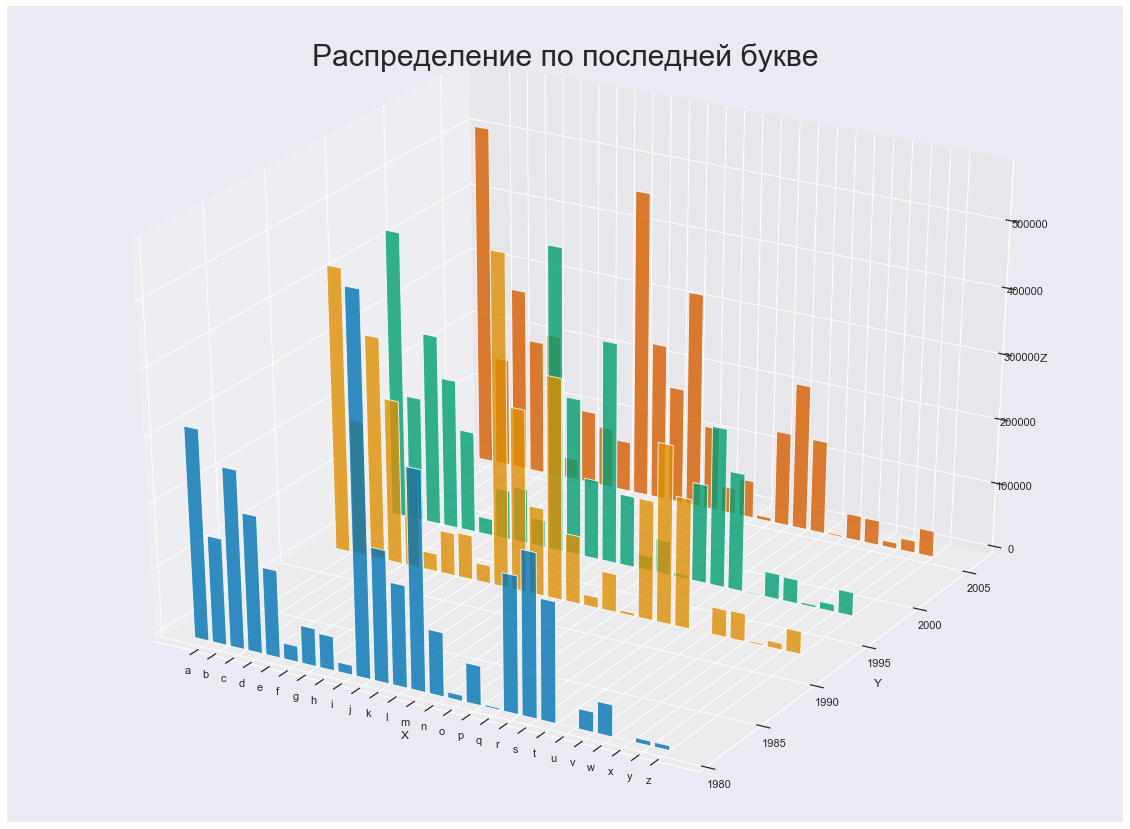

In [112]:
fig = plt.figure(figsize = (20,15))
ax = fig.add_subplot(111, projection='3d')
b_last = b.groupby(['year', 'last_letter'])['count'].sum().reset_index()
for year in b_first['year'].unique():
    df_ = b_first.loc[b_first['year'] == year]
    ax.bar(df_['first_letter'], df_['count'], year, zdir = 'y',   alpha = 0.8)
plt.ylim((1980,2007))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Распределение по последней букве', fontsize = 30)

plt.show()

**Составьте список из нескольких известных людей (президенты, певцы, актеры, киногерои) и оцените их влияние на динамику имен, постройте наглядную визуализацию**

In [13]:
"""
Rihanna
Rihanna released her first album in 2005 and second in 2006. 
Both entered into the Billboard Top 10. 
Her third album featured the single Umbrella which would win her first Grammy Award. 
She would go on to make four consecutive albums that were all certified 
platinum by selling over 1 million copies

MARIAH Carey
Carey's debut album entitled Vision of Love produced four 
singles that topped the US charts. She was honored as the world's 
best selling record artist of the 90s. She suffered a breakdown in 2001 
which was followed by poor reception of her film Glitter and its soundtrack. 
While unfortunate, her career decline makes her especially interesting because 
she created both a dramatic increase as well as a dramatic decrease in babies named Mariah. Fortunately, 
her career rebounded in 2005 when her album The Emancipation of Mimi topped the charts.

"""
NAMES = ['Rihanna', 'Mariah']

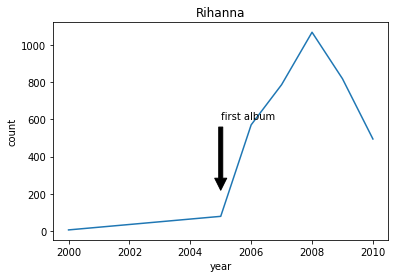

In [14]:
df_1 = babynames.loc[ (babynames['name'] == 'Rihanna') & (babynames['sex'] == 'F')]

fig, ax = plt.subplots()

ax.annotate('first album', xytext=(2005, 600), 
                           xy=(2005, 200), 
                           arrowprops=dict(facecolor='black', shrink=0.05));
sns.lineplot(x = 'year', y = 'count', data = df_1)
plt.title('Rihanna');
plt.show()

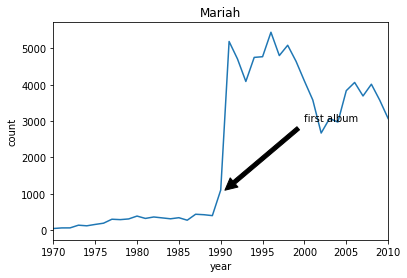

In [15]:
df_2 = babynames.loc[ (babynames['name'] == 'Mariah') & (babynames['sex'] == 'F')]

fig, ax = plt.subplots()

ax.annotate('first album', xytext=(2000, 3000), 
                           xy=(1990, 1000), 
                           arrowprops=dict(facecolor='black', shrink=0.05));
sns.lineplot(x = 'year', y = 'count', data = df_2)
ax.set_xlim([1970, 2010])
plt.title('Mariah');
plt.show()

#  Задание 2

В качестве датасета были взяты данные по игре FIFA 19 
https://www.kaggle.com/karangadiya/fifa19

In [16]:
fifa19 = pd.read_csv('input/data.csv')
print(fifa19.shape)
fifa19.head()

(18207, 89)


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [17]:
fifa19.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

### Визуализируем корреляцию характеристик футболистов

,level_0,level_1,0
828,SlidingTackle,StandingTackle,0.974659
476,Interceptions,StandingTackle,0.941471
234,BallControl,Dribbling,0.938942
473,Interceptions,SlidingTackle,0.928282
122,Acceleration,SprintSpeed,0.921928
246,BallControl,ShortPassing,0.911451
636,Marking,StandingTackle,0.906541


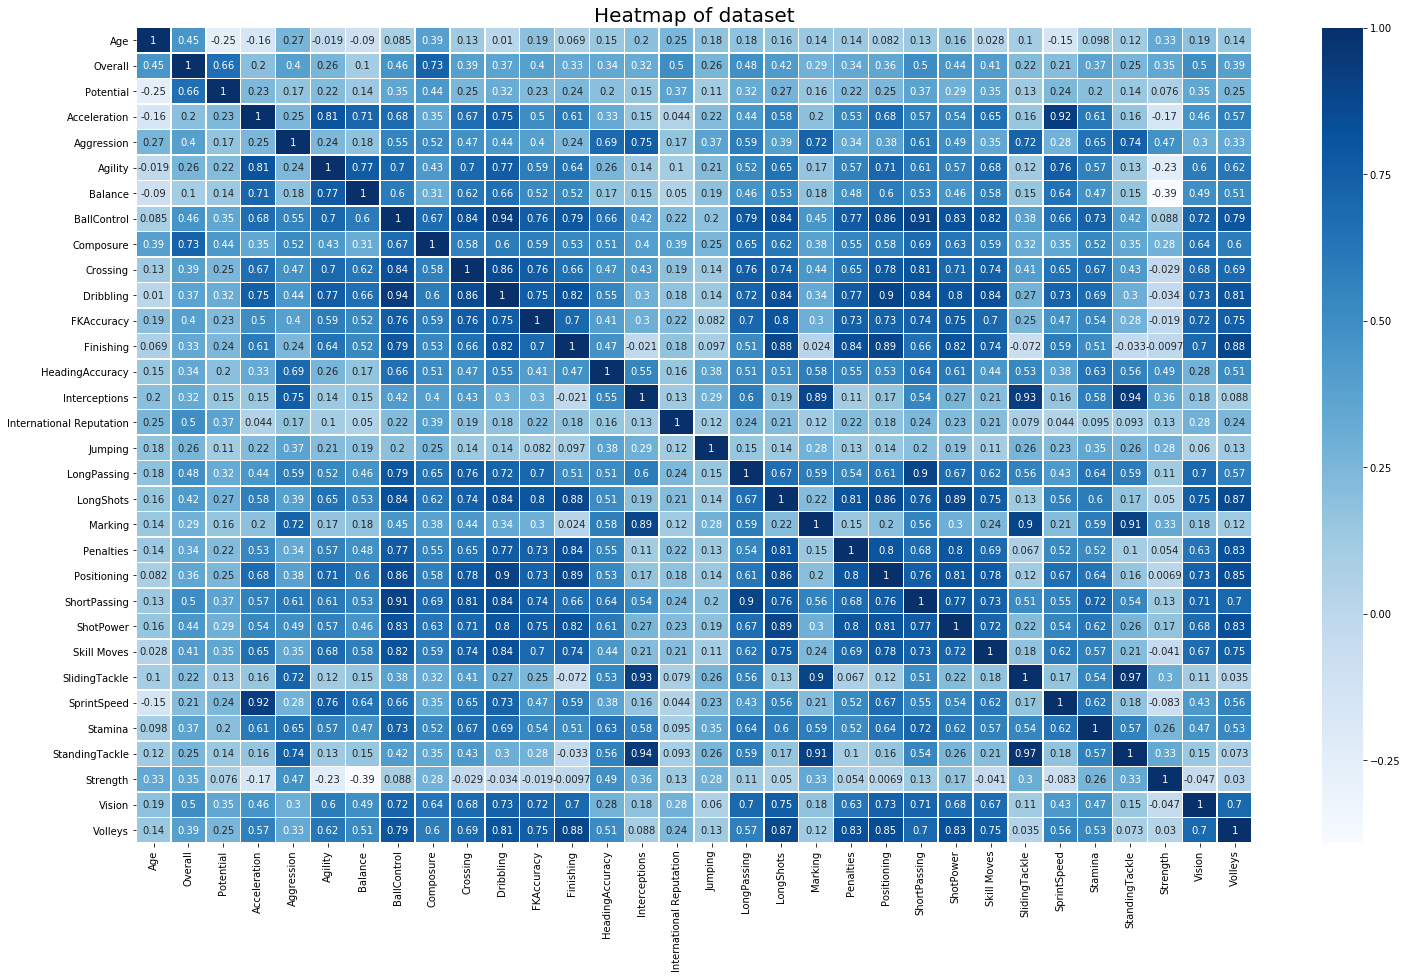

In [18]:
plt.figure(figsize=(25,15))
corrs = fifa19[['Age', 'Overall', 'Potential', 'Value', 'Wage',
                'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl', 
                'Body Type','Composure', 'Crossing','Dribbling', 'FKAccuracy', 'Finishing', 
                'HeadingAccuracy', 'Interceptions','International Reputation',
                'Joined', 'Jumping', 'LongPassing', 'LongShots',
                'Marking', 'Penalties', 'Position', 'Positioning',
                'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
                'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Vision',
                'Volleys']].corr()
hm=sns.heatmap(corrs, annot = True, linewidths=.5, cmap='Blues')
hm.set_title(label='Heatmap of dataset', fontsize=20)
hm;

most_correlated_df = pd.DataFrame(corrs.abs().unstack()).reset_index()
most_correlated_df = most_correlated_df.loc[~most_correlated_df[['level_0', 'level_1']].\
                                            apply(frozenset, axis=1).duplicated()]
most_correlated_df.loc[most_correlated_df['level_0'] != most_correlated_df['level_1']].\
                    sort_values(0, ascending = False).head(n = 7)

Можно заметить, что существуют пары с высокой корреляцией. К примеру, BallControl и Dribbling

**Для примера, построим scatter plot между Acceleration и другими признаками**

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


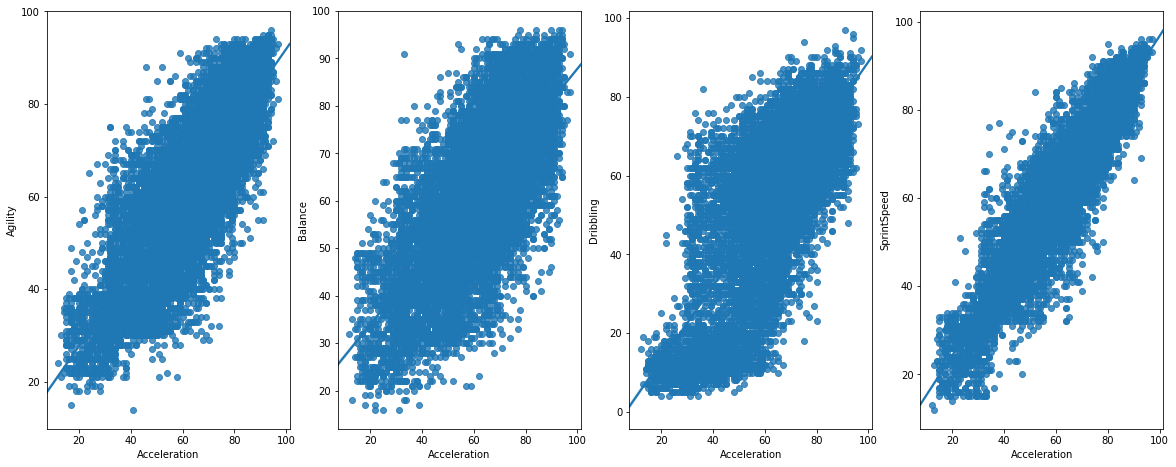

In [21]:
def make_scatter(df):
    feats = ('Agility', 'Balance', 'Dribbling', 'SprintSpeed')
    
    for index, feat in enumerate(feats):
        plt.subplot(len(feats)/4+1, 4, index+1)
        ax = sns.regplot(x = 'Acceleration', y = feat, data = df)

plt.figure(figsize = (20, 20))
plt.subplots_adjust(hspace = 0.6)

make_scatter(fifa19)

### Построим распределение игроков по возрасту

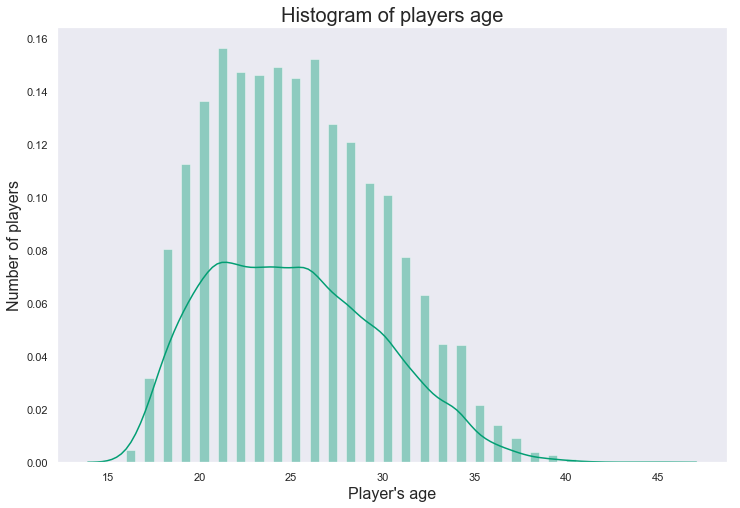

In [22]:
sns.set(style ="dark", palette="colorblind", color_codes=True)
x = fifa19['Age']
plt.figure(figsize=(12,8))
ax = sns.distplot(x, bins = 58, kde = True, color='g')
ax.set_xlabel(xlabel="Player\'s age", fontsize=16)
ax.set_ylabel(ylabel='Number of players', fontsize=16)
ax.set_title(label='Histogram of players age', fontsize=20)
plt.show()

В основном, популярные значения между 20 и 28 лет. Мода - 21 год

### Построим распределение игроков по возрасту в выбранных клубах

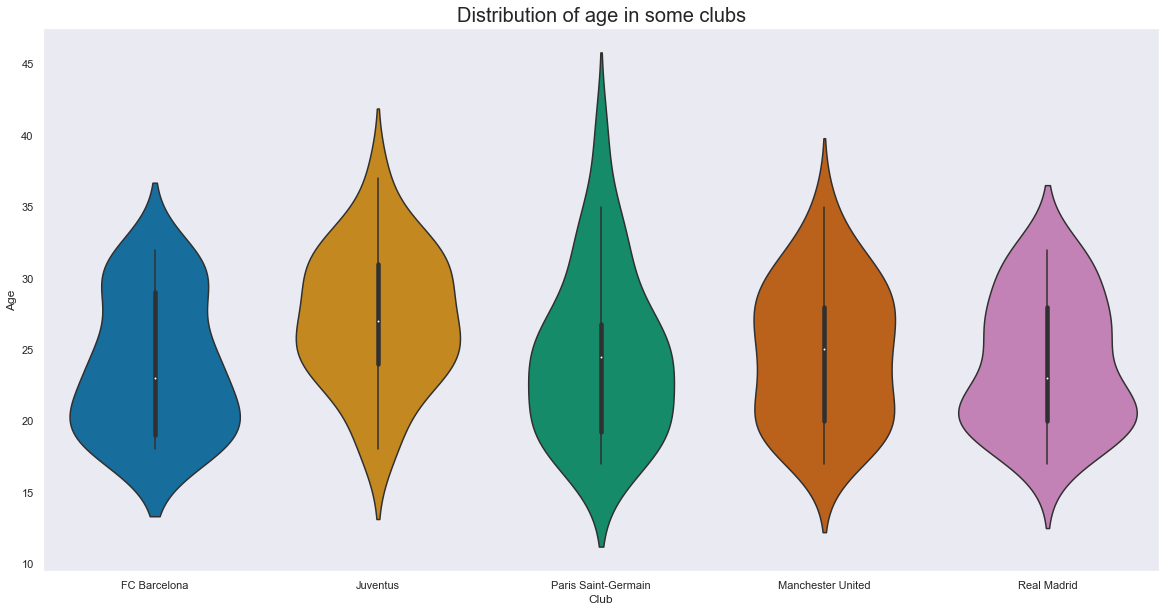

In [24]:
some_clubs = ('Juventus', 'Real Madrid', 'Paris Saint-Germain', 'FC Barcelona', 'Manchester United')
df_club = fifa19.loc[fifa19['Club'].isin(some_clubs)]

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax = sns.violinplot(x="Club", y="Age", data=df_club);
ax.set_title(label='Distribution of age in some clubs', fontsize=20);

Скорее о каком-то значимом различии сказать нельзя, но можно заметить некоторое различия в форме распределении <br>
К примеру, у Barcelona двумодальное распределение. Есть множества игроков которым около 20 лет или 30 лет <br>
В Real Madrid выраженная мода игроков 20-ти лет

### Распределение игроков по позициям

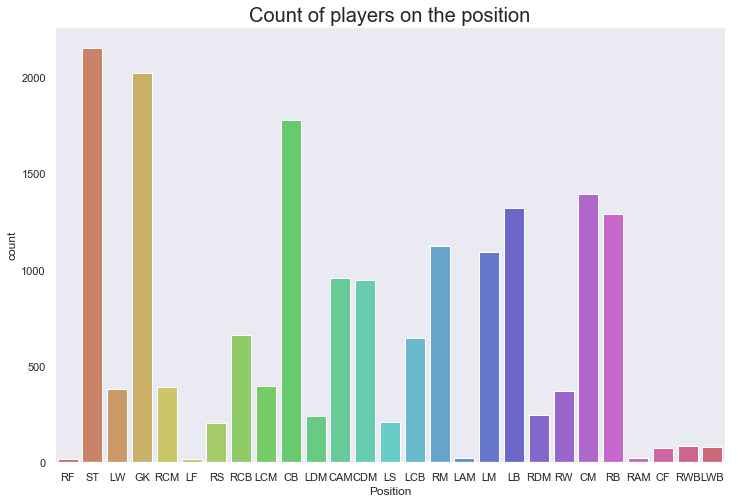

In [26]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x = 'Position', data = fifa19, palette = 'hls');
ax.set_title(label='Count of players on the position', fontsize=20);

Видно, что непопулярные позиции - это RF, LF, LAM, RAM <br>
Одни из самых популярных - ST, GK, CB